# Polymer analysis for Chadda and Vikas et al. 2024
This notebook describes the polymer analysis performed for the preprint "**Wrapping of single-stranded DNA by Replication Protein A and
modulation through phosphorylation**" written by Chadda and Vikas et al. [preprint link here](http://dx.doi.org/10.1101/2024.03.28.587234).

For any questions surrounding this analysis please reach out to Alex and Edwin. For any other questions about this paper, please contact Edwin Antony directly.

## How to cite
Please cite as:
Chadda, R., Kaushik, V., Ahmad, I. M., Deveryshetty, J., Holehouse, A., Sigurdsson, S. T. D., Bothner, B., Dastvan, R., Origanti, S. & Antony, E. Wrapping of single-stranded DNA by Replication Protein A and modulation through phosphorylation. bioRxiv (2024). doi:10.1101/2024.03.28.587234

In [1]:
## Initial pre-amble for making nice figures

import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

# KEY IMPORTA FOR SAXS WORK:
from housetools.methods import saxs

In [2]:
def polymer_fit(l,r):
    """
    Simple model that fits polymer scaling data to the standard
    r = r0*N^{nu} model.

    Parameters
    -----------------
    l : list or np.array
        List of polymer lengths to fit

    r : list or np.array
        List of polymer end-to-end distances (or radii or gyration or hydrodynamic radii).

    Returns
    ------
    tuple

        [0] - prefactor
        [1] - scaling exponent
    
    """

    if len(l) != len(r):
        raise Exception('Error: lengths and distances must match in length')

    # fit in a linearized regime in log-log space
    pfit = np.polyfit(np.log(l), np.log(r),1)

    # excise out fitting params and return
    prefactor = round(np.exp(pfit[1]),2)
    exponent = round(pfit[0],2)
    return (prefactor, exponent)

    

## Fit end-to-end distance to polymer model for ubound dTn
The cell below fits the end-to-end RMS distances measured by Chadda and Vikas et al. to a simple polymer model, backing out the apparent scaling exponent. We then superimpose the end-to-end distance obtained by [Chen et al.](http://dx.doi.org/10.1073/pnas.1119057109) on top of the fit as an independent corroboration of the fitting approach.

We note that fitting these data with a scaling exponent of 0.598 (i.e. self-avoiding chain) does not yeild a fit that explains the observed data satisfactorily.

After fitting to polymer model R_0 = 1.07 and exponent  = 0.5


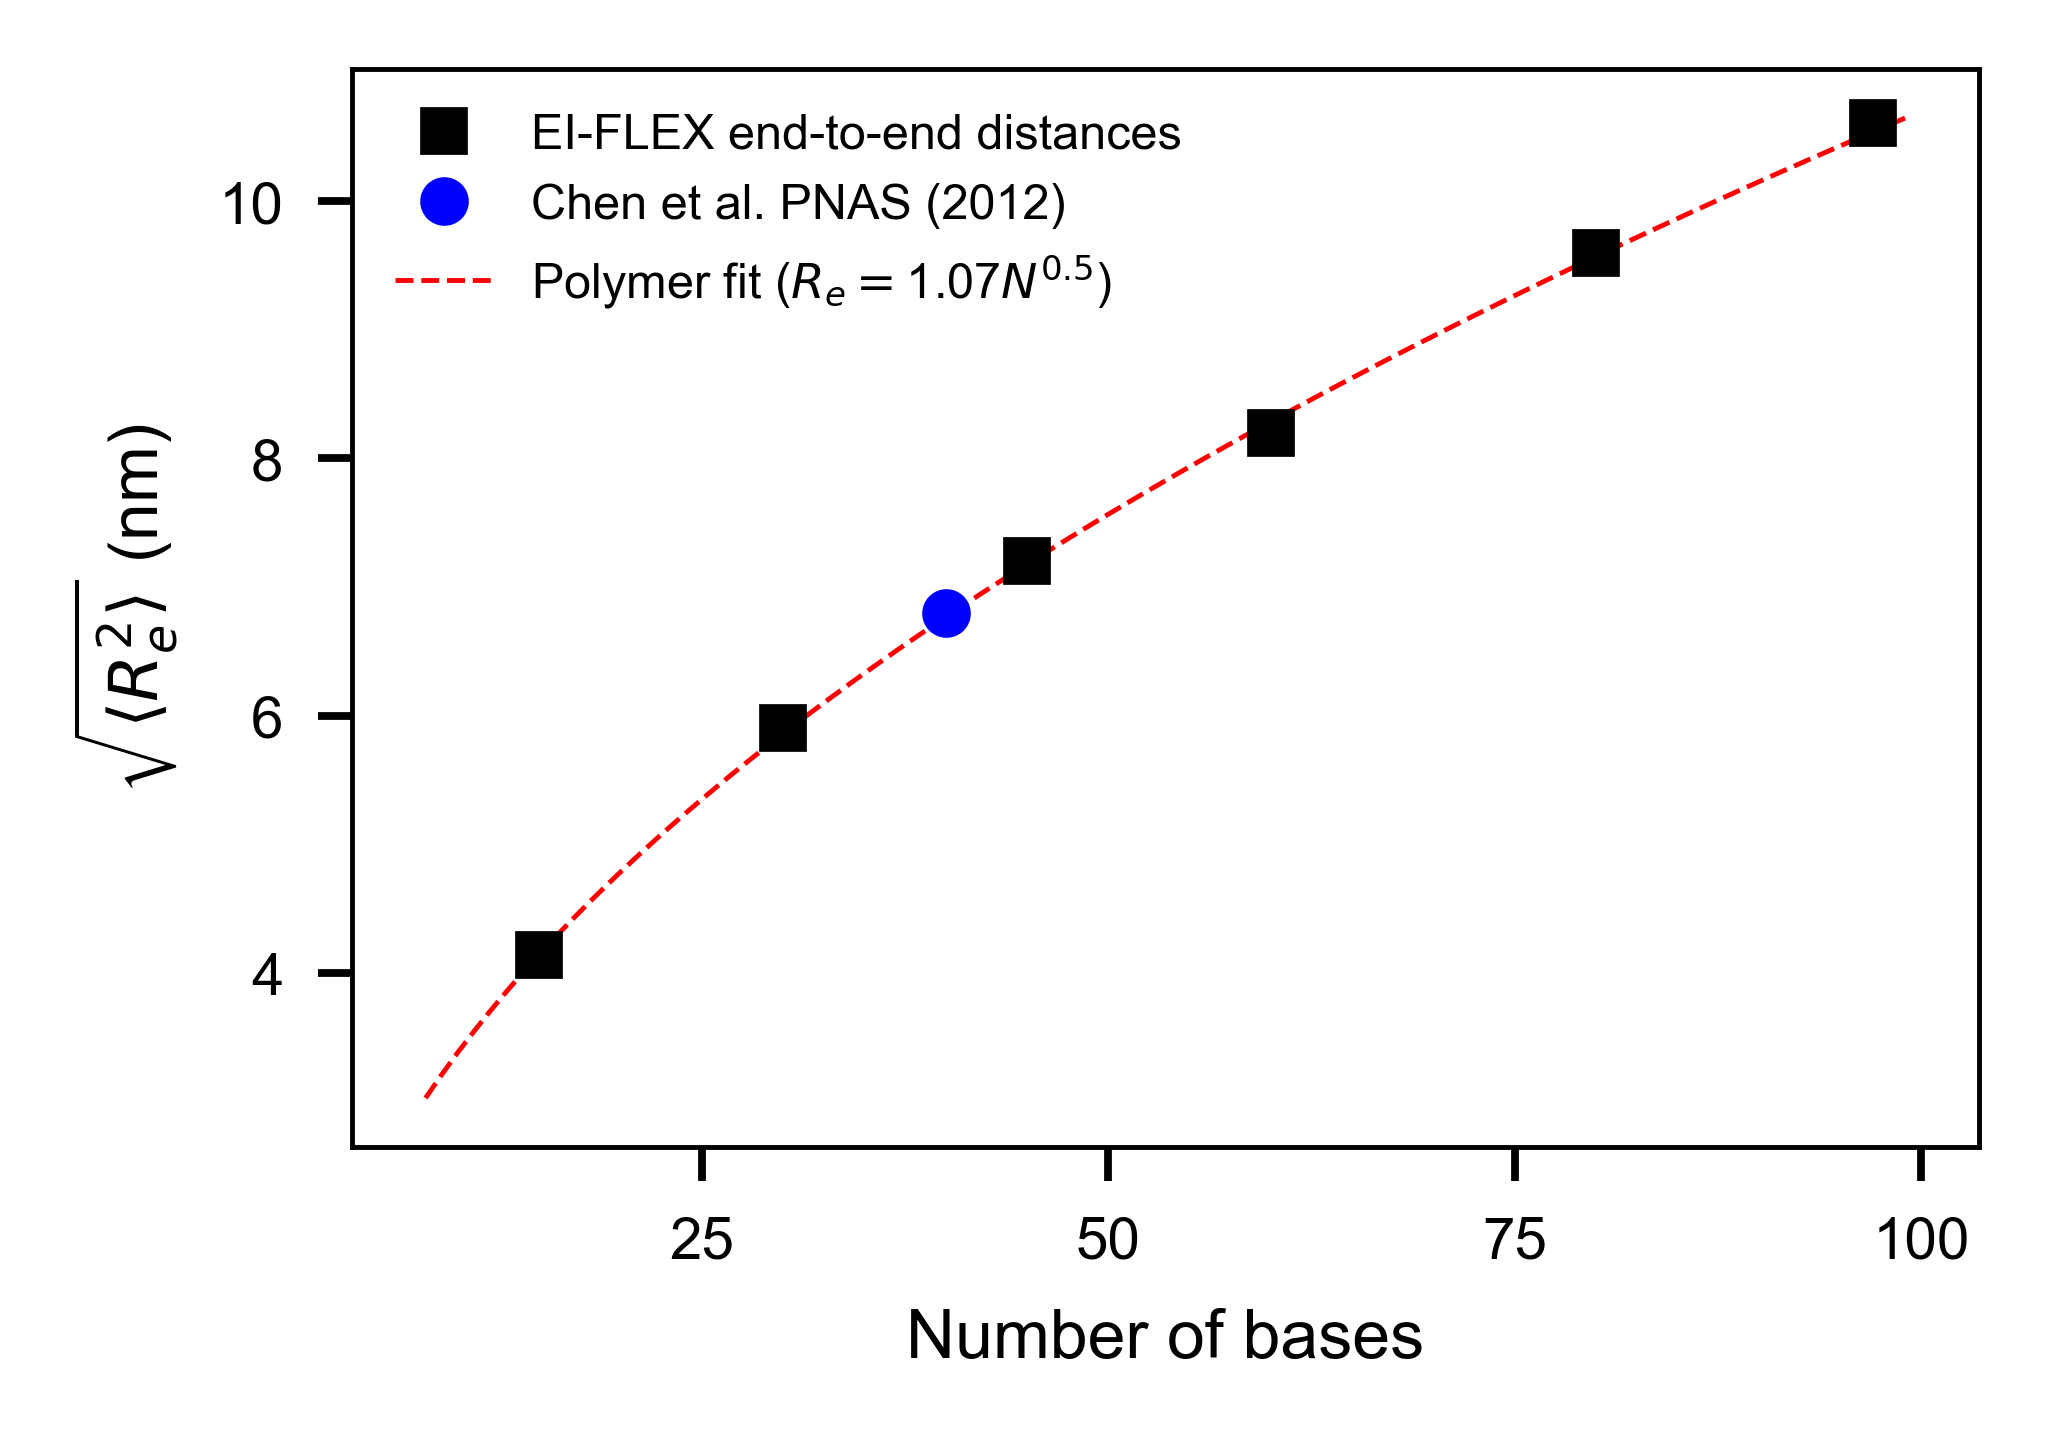

In [3]:
# lengths used
lengths_exp = [15, 30, 45, 60, 80, 97]

# root mean squared  from EI-Flex
rms_exp = [4.14, 5.9, 7.2, 8.2, 9.6, 10.61]

# length/distance from Chen et al paper.
chen_length = [40]
chen_val = [6.8]



## generate figure
figure(num=None, figsize=(3, 2), dpi=350, facecolor='w', edgecolor='k')
ax = plt.gca()


# plot EI-FLEX data
plt.plot(lengths_exp, rms_exp,'s', color='k', ms=4, label='EI-FLEX end-to-end distances',zorder=100)


# plot Chen et al data
plt.plot(chen_length, chen_val, 'o', color='b', ms=4, label='Chen et al. PNAS (2012)', zorder=100)

# calculate polymer fitting behavior
prefactor, exponent = polymer_fit(lengths_exp, rms_exp)

print(f"After fitting to polymer model R_0 = {round(prefactor,3)} and exponent  = {round(exponent,3)}")
fit_text = r'$R_e=$'+f"{prefactor}"+r'$N^{0.5}$'


# generate curves along polymer model and plot
xvals = np.arange(8,100,1)
yvals = prefactor*np.power(xvals,exponent) 
plt.plot(xvals, yvals, '--', color='r', linewidth=0.5, label='Polymer fit ('+fit_text+")")

# make look nice
plt.legend(frameon=False, fontsize=5)
plt.ylabel(r'$\sqrt{ \langle R_e^2 \rangle}$ (nm)', fontsize=7)
plt.xlabel('Number of bases',fontsize=7)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

# export data plotted here for transparency
np.savetxt('outdata/unbound_polymer_fit_data.csv',np.array([xvals, yvals]).transpose(), delimiter=', ')
np.savetxt('outdata/exp_data.csv',np.array([lengths_exp, rms_exp]).transpose(), delimiter=', ')
np.savetxt('outdata/chen_data.csv',np.array([chen_length, chen_val]).transpose(), delimiter=', ')


## Show end-to-end distance (and fit) for unbound and bound dT
The cell below fits the end-to-end RMS distances measured by Chadda and Vikas et al. for both the bound and unbound states. All data is written out for transparency.

/var/folders/2n/xtzsyspd32v6vglg_pd5gmw80000gn/T/ipykernel_94756/1702905293.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(xvals, np.array(rms_exp_linear),'-k', color='k', linewidth=0.5, label='Fully linearized dT (theoretical)')


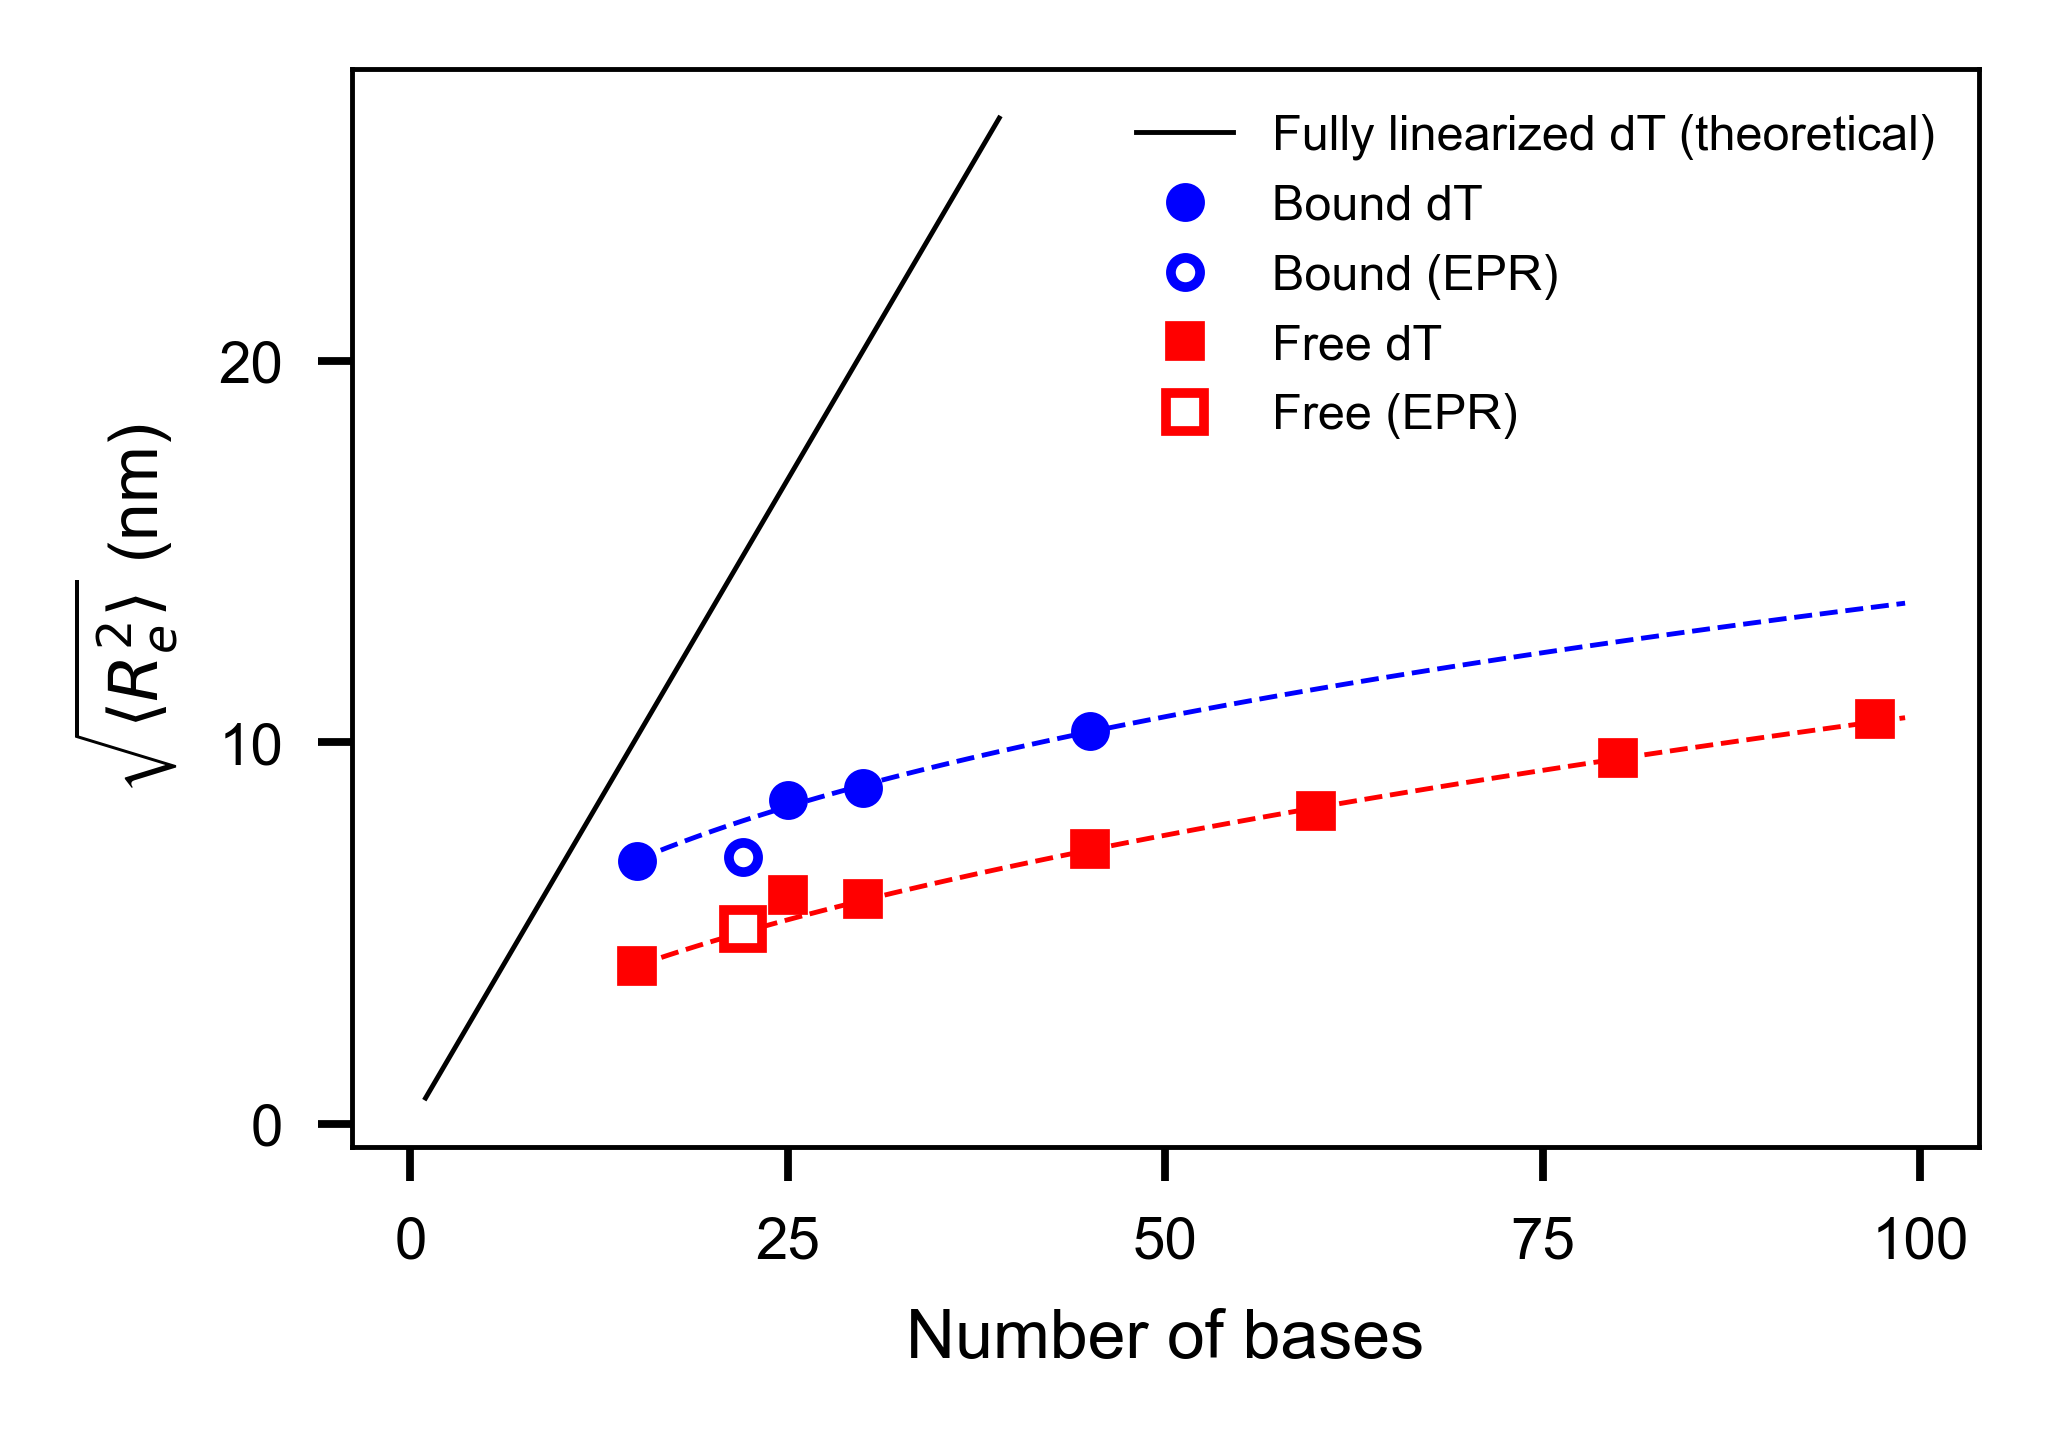

In [4]:
figure(num=None, figsize=(3, 2), dpi=350, facecolor='w', edgecolor='k')
ax = plt.gca()

# define a theoretical model whereby the inter-nucleotide distances is fixed at 0.676 (from original analysis)
INTER_NUCLEOTIDE_DISTANCE_LINEARIZED = 0.676

##
## Plot and save linearized DNA first
##

# define linearized DNA bases
xvals = np.arange(1,40)

# calculate linearized ssDNA distances
rms_exp_linear = xvals*INTER_NUCLEOTIDE_DISTANCE_LINEARIZED

plt.plot(xvals, np.array(rms_exp_linear),'-k', color='k', linewidth=0.5, label='Fully linearized dT (theoretical)')
np.savetxt('outdata/linearized_dna.csv', np.array([xvals, np.array(rms_exp_linear)]).transpose(), delimiter=',')


##
## Plot and save bound end-to-end distances from EI-FLEX
## 
lengths_exp_bound = [15, 25, 30, 45]
rms_exp_bound = [6.9, 8.5, 8.8, 10.3]

plt.plot(lengths_exp_bound, np.array(rms_exp_bound),'o', color='b', ms=3, label='Bound dT')
np.savetxt('outdata/bound_dT_EIFLEX.csv', np.array([lengths_exp_bound, np.array(rms_exp_bound)]).transpose(), delimiter=',')


# fit BOUND e2e distances to a polymer model and then plot this as a blue line. 
# NOTE - the prefactor and exponent here actually give values that are non-physical (i.e. prefactor is ~2.6 nm - this 
# reflects the fact that the BEST fit model here is (statistically) very similar to a large universality class of models 
# with variable scaling exponents, and we do not put weight on the specific details of this scaling fit BECAUSE shifting
# the unbound model with a fixed offset also reproduces the data, which is the more parsimonious explanation than assuming
# the basal DNA size suddenly expands dramatically!
prefactor, exponent = polymer_fit(lengths_exp_bound, rms_exp_bound)

xvals = np.arange(15,100,1)
yvals = prefactor*np.power(xvals,exponent) 

plt.plot(xvals, np.array(yvals), '--', color='b', linewidth=0.5)#, label='polymer fit ('+fit_text+")")
np.savetxt('outdata/bound_polymer_fit.csv', np.array([xvals, np.array(yvals)]).transpose(), delimiter=',')


##
## Plot and save bound end-to-end distances from EPR data
## 

bound_epr_len = [22]
bound_epr_dist = [7.0]
plt.plot(bound_epr_len, bound_epr_dist,'o', color='b', ms=3, mfc='white', label='Bound (EPR)')
np.savetxt('outdata/bound_epr_data.csv', np.array([bound_epr_len, np.array(bound_epr_dist)]).transpose(), delimiter=',')


##
## Plot, fit, and save unbound dT data
## 


# lengths used (re-define from earlier just to be safe!)
lengths_exp = [15, 30, 45, 60, 80, 97]

# root mean squared  from EI-Flex (re-define from earlier just to be safe!)
rms_exp = [4.14, 5.9, 7.2, 8.2, 9.6, 10.61]

# plot experimental distances
plt.plot(lengths_exp, np.array(rms_exp),'s', color='r', ms=3, label='Free dT')


# length/distance from Chen et al paper. (re-define from earlier just to be safe!)
chen_length = [40]
chen_val = [6.8]

prefactor, exponent = polymer_fit(lengths_exp, rms_exp)

xvals = np.arange(15,100,1)
yvals = prefactor*np.power(xvals,exponent) 

plt.plot(xvals, np.array(yvals), '--', color='r', linewidth=0.5)#, label='polymer fit ('+fit_text+")")
np.savetxt('outdata/free_polymer_fit.csv', np.array([xvals, np.array(yvals)]).transpose(), delimiter=',')


##
## Plot and save extra bonus unbound data 
## 

lengths_exp_free_bonus = [25]
rms_exp_free_bonus = [6]
plt.plot(lengths_exp_free_bonus, np.array(rms_exp_free_bonus),'s', color='r', ms=3)
np.savetxt('outdata/extra_free.csv', np.array([lengths_exp_free_bonus, np.array(rms_exp_free_bonus)]).transpose(), delimiter=',')


##
## Plot and save unbound end-to-end distances from EPR data
## 

unbound_epr_len = [22]
unbound_epr_dist = [5.1]
plt.plot(unbound_epr_len, unbound_epr_dist,'s', color='r', ms=4, mfc='white', label='Free (EPR)')
np.savetxt('outdata/unbound_epr_data.csv', np.array([unbound_epr_len, np.array(unbound_epr_dist)]).transpose(), delimiter=',')

## format figures

plt.legend(frameon=False, fontsize=5)
plt.ylabel(r'$\sqrt{ \langle R_e^2 \rangle}$ (nm)', fontsize=7)
plt.xlabel('Number of bases',fontsize=7)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
print('')





## Show that unbound polymer model fits bound state with a fixed upshift
This analysis shows that effectively the same scaling behavior observed in the unbound state can describe the conformational behavior in the bound state, incosnsistent with a DNA linearization model.

(array([ 0.,  5., 10., 15., 20.]),
 [Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20')])

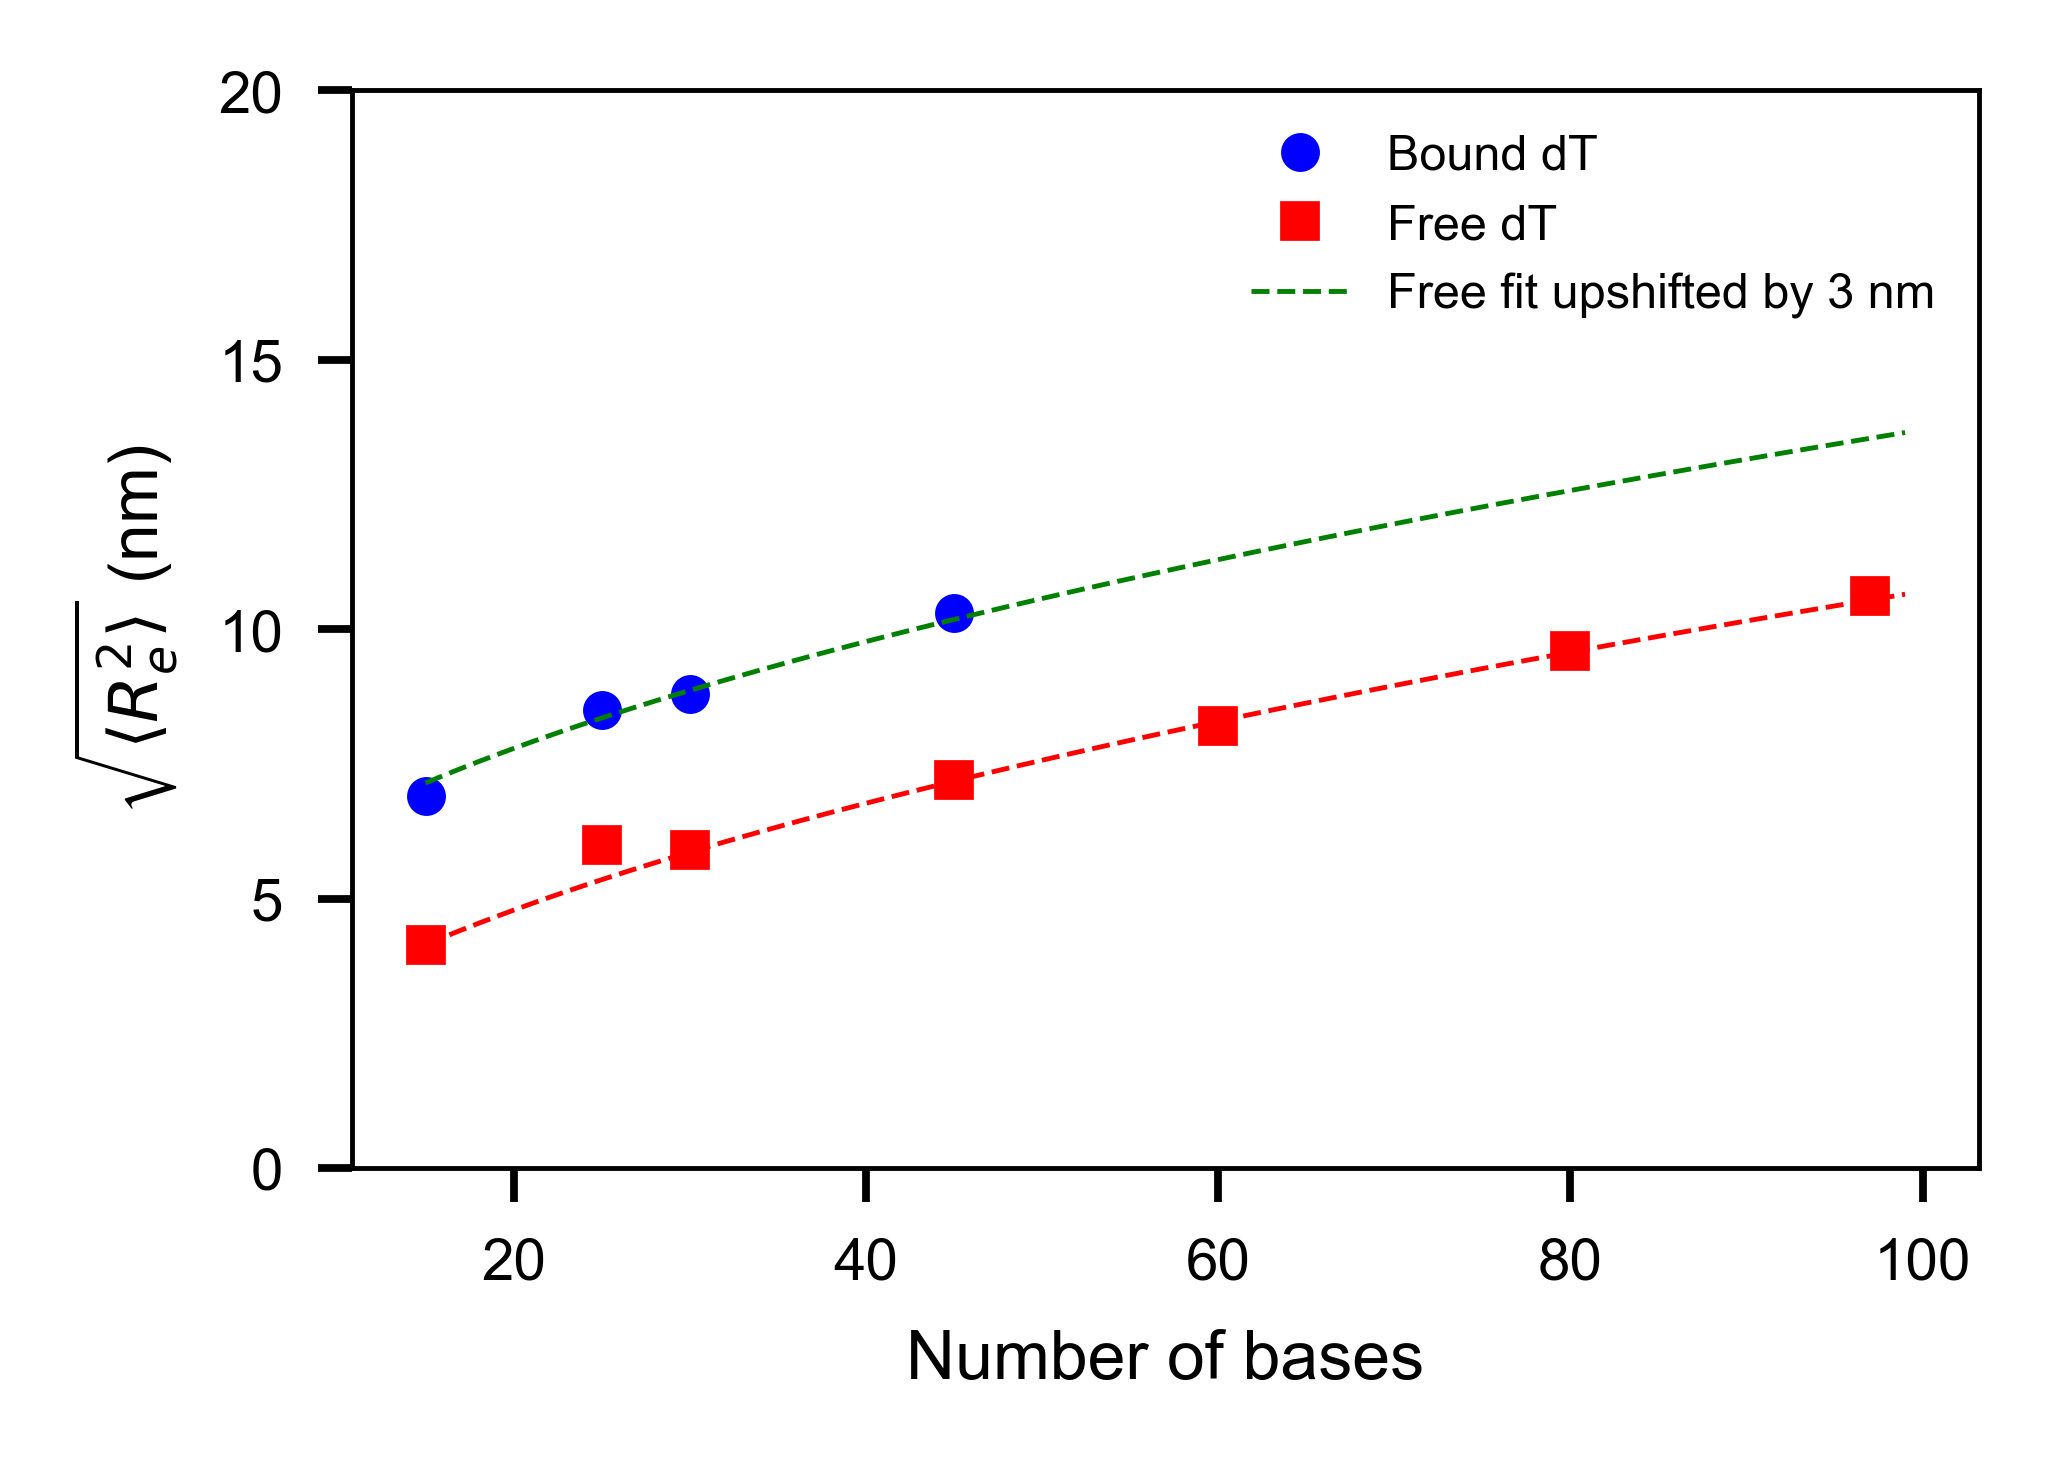

In [5]:

figure(num=None, figsize=(3, 2), dpi=350, facecolor='w', edgecolor='k')
ax = plt.gca()


xvals = np.arange(1,40)
rms_exp_linear = xvals*0.676

plt.ylim([0,20])

# lengths / distance for bound data (EI-FLEX only)
lengths_exp_bound = [15, 25, 30, 45]
rms_exp_bound = [6.9, 8.5, 8.8, 10.3]


# lengths / distance for unbound data (EI-FLEX only)
lengths_exp = [15, 30, 45, 60, 80, 97]
rms_exp = [4.14, 5.9, 7.2, 8.2, 9.6, 10.61]
lengths_exp_free_bonus = [25]
rms_exp_free_bonus = [6]


# plot bound data 
plt.plot(lengths_exp_bound, np.array(rms_exp_bound),'o', color='b', ms=3, label='Bound dT')

# plot unbound data 
plt.plot(lengths_exp, np.array(rms_exp),'s', color='r', ms=3, label='Free dT')
plt.plot(lengths_exp_free_bonus, np.array(rms_exp_free_bonus),'s', color='r', ms=3)


# fit polymer model to unbound data ONLY and extract line (xvals and yvals)
prefactor, exponent = polymer_fit(lengths_exp, rms_exp)
xvals = np.arange(15,100,1)
yvals = prefactor*np.power(xvals,exponent) 

# plot fit to unbound data
plt.plot(xvals, np.array(yvals), '--', color='r', linewidth=0.5)#, label='polymer fit ('+fit_text+")")

# upshift unbound model by 3 n
UPSHIFT = 3.0
upshift_yvals = np.array(yvals)+UPSHIFT

plt.plot(xvals, upshift_yvals, '--', color='green', linewidth=0.5, label='Free fit upshifted by 3 nm')#, label='polymer fit ('+fit_text+")")

np.savetxt('outdata/unbound_polymer_fit_data_with_3nm_upshift.csv',np.array([xvals, upshift_yvals]).transpose(), delimiter=', ')

plt.legend(frameon=False, fontsize=5)
plt.ylabel(r'$\sqrt{ \langle R_e^2 \rangle}$ (nm)', fontsize=7)
plt.xlabel('Number of bases',fontsize=7)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)



